## Paquetes

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.wrappers.scikit_learn import KerasRegressor

## Modelo

Se lee el archivo CSV con todos los datos. Para esto, se utiliza la función loadtxt del paquete NumPY.  
Luego se separan las filas en dos listas con el fin de tener las variables separadas de la variable objetivo.  
Por último se realiza un escalado de datos.

In [4]:
# Lectura
dataset=np.loadtxt("cars.csv", delimiter=",", skiprows=1)

# Separación
x=dataset[:,0:5]
y=dataset[:,5]
y=np.reshape(y, (-1,1))

scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()

scaler_x.fit(x)
xscale=scaler_x.transform(x)
scaler_y.fit(y)
yscale=scaler_y.transform(y)

MinMaxScaler()
MinMaxScaler()


Luego, se separan los datos en datos de entrenamiento y datos de testeo

In [5]:
X_train, X_test, y_train, y_test = train_test_split(xscale, yscale)

Se crea un modelo de red neuronal muy básico que consiste de:
    * Una capa de 12 neuronas con función de activación ReLU
    * Una capa de 8 neuronas con función de activación ReLU
    * Una capa de 1 neurona con función de activación Linear (Es decir, sin activación)

In [6]:
model [(5), 12, 8, 1]

model = Sequential()
model.add(Dense(12, input_dim=5, kernel_initializer='normal', activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='linear'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12)                72        
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 185
Trainable params: 185
Non-trainable params: 0
_________________________________________________________________


Se compila el modelo para poder ser entrenado

In [7]:
model.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])

Por último, se entrena el modelo con los parametros elegidos

In [8]:
history = model.fit(X_train, y_train, epochs=150, batch_size=50, verbose=1, validation_split=0.2)

Epoch 1/150
12/12 [==============================] - 0s 13ms/step - loss: 0.1769 - mse: 0.1769 - mae: 0.3127 - val_loss: 0.1304 - val_mse: 0.1304 - val_mae: 0.2663
Epoch 2/150
12/12 [==============================] - 0s 2ms/step - loss: 0.1014 - mse: 0.1014 - mae: 0.2382 - val_loss: 0.0789 - val_mse: 0.0789 - val_mae: 0.2228
Epoch 3/150
12/12 [==============================] - 0s 3ms/step - loss: 0.0687 - mse: 0.0687 - mae: 0.2156 - val_loss: 0.0586 - val_mse: 0.0586 - val_mae: 0.2088
Epoch 4/150
12/12 [==============================] - 0s 3ms/step - loss: 0.0580 - mse: 0.0580 - mae: 0.2086 - val_loss: 0.0528 - val_mse: 0.0528 - val_mae: 0.2025
Epoch 5/150
12/12 [==============================] - 0s 2ms/step - loss: 0.0541 - mse: 0.0541 - mae: 0.2037 - val_loss: 0.0493 - val_mse: 0.0493 - val_mae: 0.1953
Epoch 6/150
12/12 [==============================] - 0s 2ms/step - loss: 0.0494 - mse: 0.0494 - mae: 0.1946 - val_loss: 0.0462 - val_mse: 0.0462 - val_mae: 0.1873
Epoch 7/150
12/12 [==

12/12 [==============================] - 0s 3ms/step - loss: 0.0129 - mse: 0.0129 - mae: 0.0861 - val_loss: 0.0207 - val_mse: 0.0207 - val_mae: 0.0999
Epoch 52/150
12/12 [==============================] - 0s 9ms/step - loss: 0.0129 - mse: 0.0129 - mae: 0.0853 - val_loss: 0.0209 - val_mse: 0.0209 - val_mae: 0.0996
Epoch 53/150
12/12 [==============================] - 0s 2ms/step - loss: 0.0128 - mse: 0.0128 - mae: 0.0851 - val_loss: 0.0206 - val_mse: 0.0206 - val_mae: 0.1000
Epoch 54/150
12/12 [==============================] - 0s 2ms/step - loss: 0.0128 - mse: 0.0128 - mae: 0.0860 - val_loss: 0.0208 - val_mse: 0.0208 - val_mae: 0.0994
Epoch 55/150
12/12 [==============================] - 0s 2ms/step - loss: 0.0128 - mse: 0.0128 - mae: 0.0851 - val_loss: 0.0205 - val_mse: 0.0205 - val_mae: 0.0996
Epoch 56/150
12/12 [==============================] - 0s 2ms/step - loss: 0.0128 - mse: 0.0128 - mae: 0.0851 - val_loss: 0.0208 - val_mse: 0.0208 - val_mae: 0.0990
Epoch 57/150
12/12 [=========

12/12 [==============================] - 0s 3ms/step - loss: 0.0117 - mse: 0.0117 - mae: 0.0802 - val_loss: 0.0196 - val_mse: 0.0196 - val_mae: 0.0956
Epoch 102/150
12/12 [==============================] - 0s 3ms/step - loss: 0.0120 - mse: 0.0120 - mae: 0.0825 - val_loss: 0.0201 - val_mse: 0.0201 - val_mae: 0.0950
Epoch 103/150
12/12 [==============================] - 0s 3ms/step - loss: 0.0117 - mse: 0.0117 - mae: 0.0804 - val_loss: 0.0195 - val_mse: 0.0195 - val_mae: 0.0971
Epoch 104/150
12/12 [==============================] - 0s 3ms/step - loss: 0.0118 - mse: 0.0118 - mae: 0.0819 - val_loss: 0.0201 - val_mse: 0.0201 - val_mae: 0.0953
Epoch 105/150
12/12 [==============================] - 0s 3ms/step - loss: 0.0117 - mse: 0.0117 - mae: 0.0806 - val_loss: 0.0196 - val_mse: 0.0196 - val_mae: 0.0955
Epoch 106/150
12/12 [==============================] - 0s 3ms/step - loss: 0.0116 - mse: 0.0116 - mae: 0.0804 - val_loss: 0.0195 - val_mse: 0.0195 - val_mae: 0.0950
Epoch 107/150
12/12 [===

Se visualiza la gráfica de función de pérdida

dict_keys(['loss', 'mse', 'mae', 'val_loss', 'val_mse', 'val_mae'])


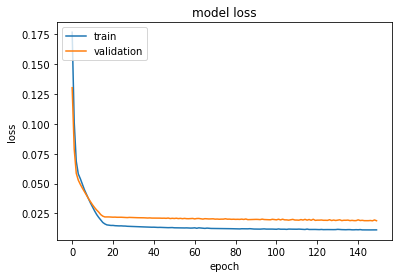

In [9]:
print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

## Predicción

Una predicción del modelo entrenado para probrar nuestro modelo con un nuevo dato

In [10]:
Xnew = np.array([[40, 0, 26, 9000, 8000]])

In [11]:
Xnew = np.array([[40, 0, 26, 9000, 8000]])
Xnew= scaler_x.transform(Xnew)
ynew= model.predict(Xnew)
#invert normalize
ynew = scaler_y.inverse_transform(ynew) 
Xnew = scaler_x.inverse_transform(Xnew)
print("X=%s, Predicted=%s" % (Xnew[0], ynew[0]))

X=[  40.    0.   26. 9000. 8000.], Predicted=[14143.134]
